In [1]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

In [2]:
def plot_data(pl, X, y):
    # plot class where y==0
    pl.plot(X[y==0, 0], X[y==0,1], 'ob', alpha=0.5)
    # plot class where y==1
    pl.plot(X[y==1, 0], X[y==1,1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl

#   Common function that draws the decision boundaries
def plot_decision_boundary(model, X, y):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)

    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]

    # make prediction with the model and reshape the output so contourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    # plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    # plot the moons of data
    plot_data(plt, X, y)

    return plt


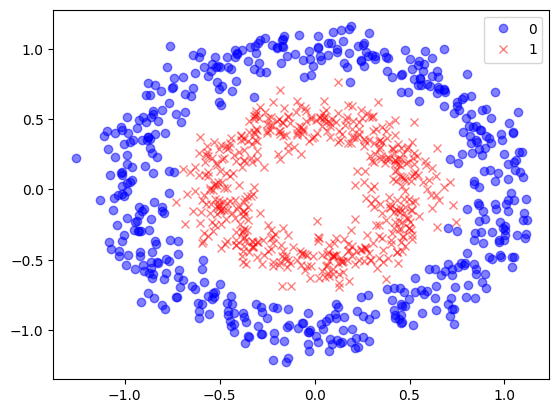

In [37]:
X, y = make_circles(n_samples=1000,factor=0.5, noise=0.1, random_state=42)

pl = plot_data(plt, X, y)
pl.show()

# Split the data into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the keras model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

#   Simple Sequential model
import keras
import tensorflow as tf
mod = keras.models.Sequential()


In [38]:
mod.layers
mod.add(Dense(4, input_shape=(2,), activation="tanh"))
mod.add(Dense(4, activation="tanh"))
mod.add(Dense(1, activation="sigmoid"))
# mod.load_weights('content/drive/My_Drive')

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9888 - loss: 0.0510 - val_accuracy: 0.9800 - val_loss: 0.0605
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9905 - loss: 0.0436 - val_accuracy: 0.9633 - val_loss: 0.0687
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9878 - loss: 0.0505 - val_accuracy: 0.9733 - val_loss: 0.0801
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9967 - loss: 0.0183 - val_accuracy: 0.9767 - val_loss: 0.0766
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9838 - loss: 0.0457 - val_accuracy: 0.9833 - val_loss: 0.0507
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9932 - loss: 0.0202 - val_accuracy: 0.9900 - val_loss: 0.0347
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9901 - loss: 0.0348 - val_accuracy: 0.9633 - val_loss: 0.1093
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9793 - loss: 0.0365 - val_accuracy: 0.9767 - 

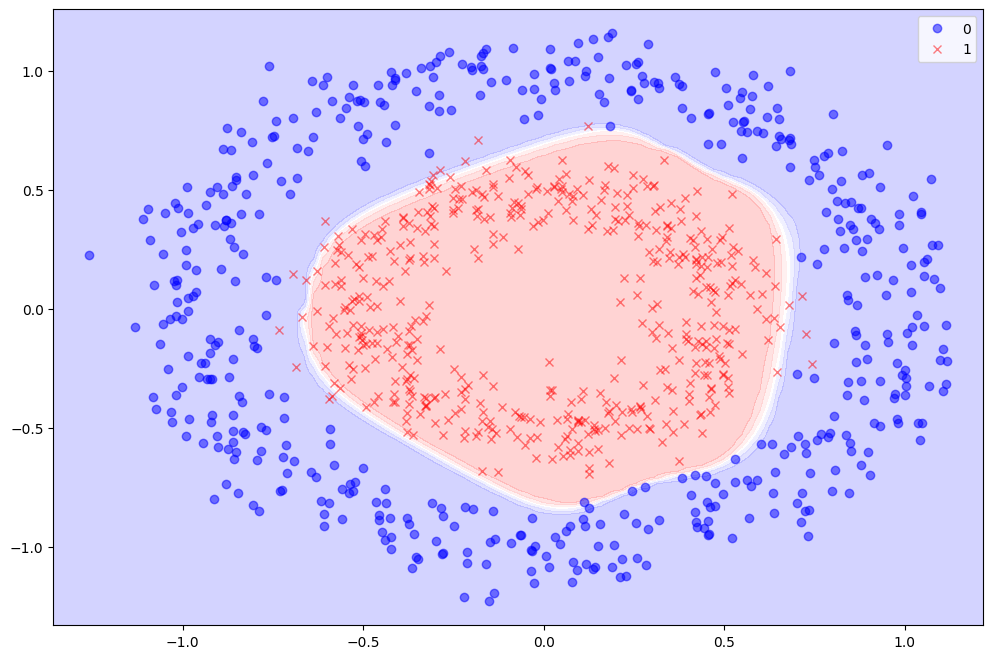

In [46]:
import keras.callbacks as cb

cal = [cb.EarlyStopping(monitor= 'val_accuracy',patience  = 5,mode = 'max')]
#   Compile the model.  Minimize crossentopy for a binary.  Maximize for accuracy
mod.compile(optimizer = Adam(0.1), loss ='binary_crossentropy', metrics=['accuracy'])
#   Fit the model with the data from make_blobs.  Make 100 cycles through the data.
#       Set verbose to 0 to supress progress messages
mod.fit(X_train, y_train, epochs=100, verbose=1,callbacks= cal,validation_data = (X_test,y_test))
#   Get loss and accuracy on test data
eval_result = mod.evaluate(X_test, y_test)
#   Print test accuracy
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])
#   Plot the decision boundary
plot_decision_boundary(mod, X, y).show()

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4825 - loss: 0.7052 - val_accuracy: 0.6400 - val_loss: 0.6451
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7045 - loss: 0.6248 - val_accuracy: 0.8733 - val_loss: 0.4382
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8811 - loss: 0.3473 - val_accuracy: 0.9067 - val_loss: 0.2339
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9598 - loss: 0.1342 - val_accuracy: 0.9467 - val_loss: 0.1542
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9575 - loss: 0.1365 - val_accuracy: 0.9800 - val_loss: 0.0833
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9661 - loss: 0.0919 - val_accuracy: 0.9800 - val_loss: 0.0702
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9732 - loss: 0.0675 - val_accuracy: 0.9533 - val_loss: 0.1165
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9823 - loss: 0.0458 - val_accuracy: 0.9667 - v

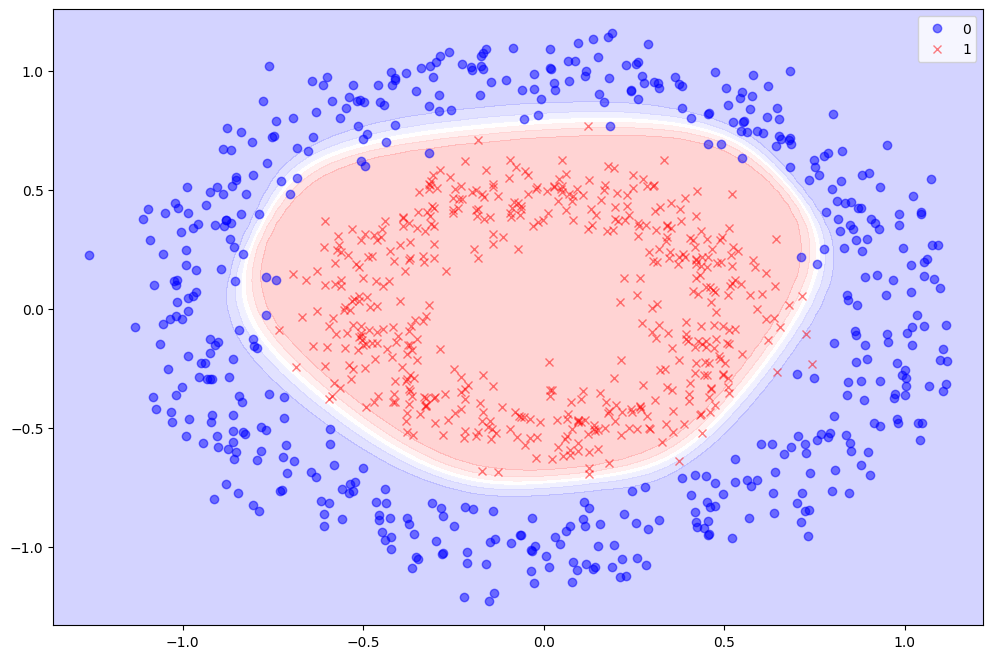

In [67]:
import keras.callbacks as cb
from keras.models import Model
from keras.layers import Input

inputs = Input([2,])
x = Dense(4, activation="tanh", name='e')(inputs)
x = Dense(4, activation="tanh", name='ee')(x)
outp = Dense(1, activation="sigmoid", name='eee')(x)

# Create the model
mod = Model(inputs=inputs, outputs=outp)


cal = [cb.EarlyStopping(monitor='val_accuracy', patience=5, mode='max')]
#   Compile the model.  Minimize crossentopy for a binary.  Maximize for accuracy
mod.compile(optimizer=Adam(0.1), loss='binary_crossentropy', metrics=['accuracy'])
#   Fit the model with the data from make_blobs.  Make 100 cycles through the data.
#       Set verbose to 0 to supress progress messages
mod.fit(X_train, y_train, epochs=100, verbose=1, callbacks=cal, validation_data=(X_test, y_test))
#   Get loss and accuracy on test data
eval_result = mod.evaluate(X_test, y_test)
#   Print test accuracy
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])
#   Plot the decision boundary
plot_decision_boundary(mod, X, y).show()

In [53]:
mod.layers

[<InputLayer name=keras_tensor_1179CLONE, built=True>]